In [95]:
# Import Libraries
import simfin as sf
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import Counter

In [96]:
# Set API Key 
sf.set_api_key('ZLj424KDiohtSc0u9bVaF7mIeIemoAir')

In [97]:
# Make directory for data 
sf.set_data_dir('~/simfin_data/')

In [98]:
# Loading financial ratio data in a DataFrame
ratios_df = sf.load_derived(variant='quarterly-asreported', market='us')
print(ratios_df.head())

Dataset "us-derived-quarterly-asreported" on disk (6 days old).
- Loading from disk ... Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   

                   Restated Date       EBITDA  Total Debt  Free Cash Flow  \
Ticker Report Date                                                          
A      2010-07-31     2011-09-07  175000000.0  3678000000     174000000.0   
       2010-10-31     2012-12-20  270000000.0  3691000000     258000000.0   
       2011-01-31     2012-03-

In [99]:
pd.DataFrame(ratios_df)

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   
...                      ...      ...          ...           ...          ...   
ZYXI   2020-09-30     171401      USD         2020            Q3   2020-10-27   
       2020-12-31     171401      USD         2020            Q4   2021-02-25   
       2021-03-31     171401      USD         2021            Q1   2021-04-29   
       2021-06-30     171401      USD         2021            Q2   2021-07-29   
       2021-09-30     171401      USD         2021            Q3   2021-11-02   

                   Restated Date       EBITDA  Total Debt  Free Cash Flow  \
Ticker Report Date                                                          
A      2010-07-31     2011-09-07  175000000.0  3678000000     174000000.0   
       2010-10-31     2012-12-20  270000000.0  3691000000     258000000.0   
       2011-01-31     2012-03-05  274000000.0  2139000000      65000000.0   
       2011-04-30     2012-06-04  330000000.0  2144000000     393000000.0   
       2011-07-31     2012-09-05  344000000.0  2168000000      74000000.0   
...                          ...          ...         ...             ...   
ZYXI   2020-09-30     2020-10-27    1914000.0           0             NaN   
       2020-12-31     2021-02-25    2827000.0           0      -3070000.0   
       2021-03-31     2021-04-29    -594000.0           0      -6150000.0   
       2021-06-30     2021-07-29    4422000.0           0       1714000.0   
       2021-09-30     2021-11-02    8641000.0           0       6443000.0   

                    Gross Profit Margin  ...  Sales Per Share  \
Ticker Report Date                       ...                    
A      2010-07-31               0.52384  ...          3.98847   
       2010-10-31               0.52919  ...          4.58140   
       2011-01-31               0.53720  ...          4.37752   
       2011-04-30               0.53667  ...          4.83285   
       2011-07-31               0.52750  ...          4.85920   
...                                 ...  ...              ...   
ZYXI   2020-09-30               0.78548  ...          0.52791   
       2020-12-31               0.77899  ...          0.66900   
       2021-03-31               0.75604  ...          0.62961   
       2021-06-30               0.76575  ...          0.81016   
       2021-09-30               0.80346  ...          0.90956   

                    Equity Per Share  Free Cash Flow Per Share  \
Ticker Report Date                                               
A      2010-07-31            8.07493                   0.50144   
       2010-10-31            9.38372                   0.75000   
       2011-01-31            9.60231                   0.18732   
       2011-04-30           11.39193                   1.13256   
       2011-07-31           12.04598                   0.21264   
...                              ...                       ...   
ZYXI   2020-09-30            1.43170                       NaN   
       2020-12-31            1.48550                  -0.08021   
       2021-03-31            1.46534                  -0.16049   
       2021-06-30            1.49644                   0.04476   
       2021-09-30            1.65730                   0.16847   

                    Dividends Per Share  Piotroski F-Score  \
Ticker Report Date                                           
A      2010-07-31                   NaN                NaN   
       2010-10-31                   0.0                6.0   
       2011

In [100]:
# Drop columns which will not add values
    # SimFinID has no relation to stock performance
    # All stock ratios are in US dollars
    # Restated date
    # Dividends Per Share and Dividends Payout Ratio filled with NaN or 0.0
ratios_df.drop(columns=['SimFinId', 'Currency', 'Restated Date', 'Dividends Per Share', 'Dividend Payout Ratio'], axis=1, inplace=True)
ratios_df

Fiscal Year Fiscal Period Publish Date       EBITDA  \
Ticker Report Date                                                        
A      2010-07-31          2010            Q3   2010-10-06  175000000.0   
       2010-10-31          2010            Q4   2010-12-20  270000000.0   
       2011-01-31          2011            Q1   2011-03-09  274000000.0   
       2011-04-30          2011            Q2   2011-06-07  330000000.0   
       2011-07-31          2011            Q3   2011-09-07  344000000.0   
...                         ...           ...          ...          ...   
ZYXI   2020-09-30          2020            Q3   2020-10-27    1914000.0   
       2020-12-31          2020            Q4   2021-02-25    2827000.0   
       2021-03-31          2021            Q1   2021-04-29    -594000.0   
       2021-06-30          2021            Q2   2021-07-29    4422000.0   
       2021-09-30          2021            Q3   2021-11-02    8641000.0   

                    Total Debt  Free Cash Flow  Gross Profit Margin  \
Ticker Report Date                                                    
A      2010-07-31   3678000000     174000000.0              0.52384   
       2010-10-31   3691000000     258000000.0              0.52919   
       2011-01-31   2139000000      65000000.0              0.53720   
       2011-04-30   2144000000     393000000.0              0.53667   
       2011-07-31   2168000000      74000000.0              0.52750   
...                        ...             ...                  ...   
ZYXI   2020-09-30            0             NaN              0.78548   
       2020-12-31            0      -3070000.0              0.77899   
       2021-03-31            0      -6150000.0              0.75604   
       2021-06-30            0       1714000.0              0.76575   
       2021-09-30            0       6443000.0              0.80346   

                    Operating Margin  Net Profit Margin  Return on Equity  \
Ticker Report Date                                                          
A      2010-07-31            0.08309            0.14812           0.07295   
       2010-10-31            0.12881            0.18528           0.09023   
       2011-01-31            0.13891            0.12706           0.05780   
       2011-04-30            0.15862            0.11926           0.05049   
       2011-07-31            0.16617            0.19515           0.07857   
...                              ...                ...               ...   
ZYXI   2020-09-30            0.07036            0.06656           0.02458   
       2020-12-31            0.08971            0.06979           0.03143   
       2021-03-31           -0.04480           -0.02926          -0.01257   
       2021-06-30            0.12298            0.09052           0.04901   
       2021-09-30            0.23130            0.17556           0.09635   

                    ...  Earnings Per Share, Basic  \
Ticker Report Date  ...                              
A      2010-07-31   ...                    0.59078   
       2010-10-31   ...                    0.84884   
       2011-01-31   ...                    0.55620   
       2011-04-30   ...                    0.57637   
       2011-07-31   ...                    0.94828   
...                 ...                        ...   
ZYXI   2020-09-30   ...                    0.03514   
       2020-12-31   ...                    0.04669   
       2021-03-31   ...                   -0.01842   
       2021-06-30   ...                    0.07333   
       2021-09-30   ...                    0.15968   

                    Earnings Per Share, Diluted  Sales Per Share  \
Ticker Report Date                                                 
A      2010-07-31                       0.58239          3.98847   
       2010-10-31                       0.82022          4.58140   
       2011-01-31                       0.54366          4.37752   
       2011-04-30                       0.56338          4.83285   
       

In [101]:
# Reset the index
ratios_df.reset_index(level="Ticker",inplace = True)
ratios_df.reset_index(level="Report Date",inplace = True)
# Creating a unique key by combining Ticker and Publish date
ratios_df["unique_key"] = ratios_df["Ticker"]+ratios_df["Publish Date"].astype(str)
# Setting unique_key as Index
ratios_df.set_index("unique_key",inplace = True)
# Show sample data
ratios_df.head()



,Report Date,Ticker,Fiscal Year,Fiscal Period,Publish Date,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,...,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT
unique_key,,,,,,,,,,,,,,,,,,,,,
A2010-10-06,2010-07-31,A,2010,Q3,2010-10-06,175000000.0,3678000000,174000000.0,0.52384,0.08309,...,0.59078,0.58239,3.98847,8.07493,0.50144,NaN,0.02668,0.02264,7.77714,11.83478
A2010-12-20,2010-10-31,A,2010,Q4,2010-12-20,270000000.0,3691000000,258000000.0,0.52919,0.12881,...,0.84884,0.82022,4.58140,9.38372,0.75000,6.0,0.03599,0.03180,3.85926,5.13300
A2011-03-09,2011-01-31,A,2011,Q1,2011-03-09,274000000.0,2139000000,65000000.0,0.53720,0.13891,...,0.55620,0.54366,4.37752,9.60231,0.18732,NaN,0.02907,0.00979,-1.82117,-2.36493
A2011-06-07,2011-04-30,A,2011,Q2,2011-06-07,330000000.0,2144000000,393000000.0,0.53667,0.15862,...,0.57637,0.56338,4.83285,11.39193,1.13256,NaN,0.02834,0.05569,-2.51818,-3.12406
A2011-09-07,2011-07-31,A,2011,Q3,2011-09-07,344000000.0,2168000000,74000000.0,0.52750,0.16617,...,0.94828,0.92437,4.85920,12.04598,0.21264,6.0,0.04553,0.01021,-2.71221,-3.32028


In [102]:
# Load daily shareprice data in a DataFrame
prices_df = sf.load_shareprices(variant='daily', market='us')

Dataset "us-shareprices-daily" on disk (6 days old).
- Loading from disk ... Done!


In [103]:
# reset the index to make Ticker a column
prices_df.reset_index(inplace=True)
# Keeping only relevant columns
prices_df = prices_df[["Date","Ticker","Adj. Close"]]
# renaming Adj Close column as Close
prices_df = prices_df.rename(columns={"Adj. Close":"Close"})
# setting Date as index for pct change calculation
prices_df.set_index("Date",inplace = True)
# Calculating the change in price and shifting up by 1
prices_df['pctchange'] = prices_df.groupby('Ticker').Close.pct_change().shift(-1)

#df = df[df.line_race != 0]
# Creating a classification price increase/decrease
prices_df['change'] = np.where(prices_df['pctchange'] > 0, 1, 0)
# reset the index to make Date a column
prices_df.reset_index(inplace=True)
# creating unique key by combining Date and Ticker for merging with Ratio date
prices_df["unique_key"] = prices_df["Ticker"]+prices_df["Date"].astype(str)
# setting unique key as index
prices_df.set_index("unique_key",inplace = True)
# Keeping only relevant columns
prices_df = prices_df[["Date","pctchange","change"]]
# dropping NA
prices_df.dropna()
# Show sample data
prices_df.head()

,Date,pctchange,change
unique_key,,,
A2007-01-03,2007-01-03,0.003097,1
A2007-01-04,2007-01-04,-0.009263,0
A2007-01-05,2007-01-05,-0.003562,0
A2007-01-08,2007-01-08,0.001340,1
A2007-01-09,2007-01-09,-0.008925,0


In [104]:
# merging ratio DataFrame and stock price change DataFrame
all_df = pd.concat([ratios_df,prices_df],axis=1,join="inner")
# drop the rows where there is no change in stock price
all_df = all_df[all_df.pctchange != 0]
# Show sample data
all_df.head()

,Report Date,Ticker,Fiscal Year,Fiscal Period,Publish Date,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,...,Equity Per Share,Free Cash Flow Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT,Date,pctchange,change
unique_key,,,,,,,,,,,,,,,,,,,,,
A2010-10-06,2010-07-31,A,2010,Q3,2010-10-06,175000000.0,3678000000,174000000.0,0.52384,0.08309,...,8.07493,0.50144,NaN,0.02668,0.02264,7.77714,11.83478,2010-10-06,0.016256,1
A2010-12-20,2010-10-31,A,2010,Q4,2010-12-20,270000000.0,3691000000,258000000.0,0.52919,0.12881,...,9.38372,0.75000,6.0,0.03599,0.03180,3.85926,5.13300,2010-12-20,0.004856,1
A2011-03-09,2011-01-31,A,2011,Q1,2011-03-09,274000000.0,2139000000,65000000.0,0.53720,0.13891,...,9.60231,0.18732,NaN,0.02907,0.00979,-1.82117,-2.36493,2011-03-09,-0.025379,0
A2011-06-07,2011-04-30,A,2011,Q2,2011-06-07,330000000.0,2144000000,393000000.0,0.53667,0.15862,...,11.39193,1.13256,NaN,0.02834,0.05569,-2.51818,-3.12406,2011-06-07,0.000955,1
A2011-09-07,2011-07-31,A,2011,Q3,2011-09-07,344000000.0,2168000000,74000000.0,0.52750,0.16617,...,12.04598,0.21264,6.0,0.04553,0.01021,-2.71221,-3.32028,2011-09-07,-0.043367,0


In [105]:
all_df.reset_index(inplace=True)

In [106]:
#all_df.set_index(['Ticker','Publish Date'],inplace=True)
all_df.head()

,unique_key,Report Date,Ticker,Fiscal Year,Fiscal Period,Publish Date,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,...,Equity Per Share,Free Cash Flow Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT,Date,pctchange,change
0,A2010-10-06,2010-07-31,A,2010,Q3,2010-10-06,175000000.0,3678000000,174000000.0,0.52384,...,8.07493,0.50144,NaN,0.02668,0.02264,7.77714,11.83478,2010-10-06,0.016256,1
1,A2010-12-20,2010-10-31,A,2010,Q4,2010-12-20,270000000.0,3691000000,258000000.0,0.52919,...,9.38372,0.75000,6.0,0.03599,0.03180,3.85926,5.13300,2010-12-20,0.004856,1
2,A2011-03-09,2011-01-31,A,2011,Q1,2011-03-09,274000000.0,2139000000,65000000.0,0.53720,...,9.60231,0.18732,NaN,0.02907,0.00979,-1.82117,-2.36493,2011-03-09,-0.025379,0
3,A2011-06-07,2011-04-30,A,2011,Q2,2011-06-07,330000000.0,2144000000,393000000.0,0.53667,...,11.39193,1.13256,NaN,0.02834,0.05569,-2.51818,-3.12406,2011-06-07,0.000955,1
4,A2011-09-07,2011-07-31,A,2011,Q3,2011-09-07,344000000.0,2168000000,74000000.0,0.52750,...,12.04598,0.21264,6.0,0.04553,0.01021,-2.71221,-3.32028,2011-09-07,-0.043367,0


In [107]:
# Clean irrelevant columns 
all_df.drop(columns=['unique_key', 'Report Date', 'Fiscal Year', 'Fiscal Period', 
                     'EBITDA', 'Total Debt', 'Free Cash Flow', 'Date', 'pctchange', 
                     'Piotroski F-Score'],inplace=True) 

In [108]:
# Set Ticker, Publish Date as index 
all_df.reset_index(inplace=True)
all_df.set_index(['Ticker', 'Publish Date'],inplace=True)
all_df.head()


index  Gross Profit Margin  Operating Margin  \
Ticker Publish Date                                                 
A      2010-10-06        0              0.52384           0.08309   
       2010-12-20        1              0.52919           0.12881   
       2011-03-09        2              0.53720           0.13891   
       2011-06-07        3              0.53667           0.15862   
       2011-09-07        4              0.52750           0.16617   

                     Net Profit Margin  Return on Equity  Return on Assets  \
Ticker Publish Date                                                          
A      2010-10-06              0.14812           0.07295           0.02253   
       2010-12-20              0.18528           0.09023           0.03012   
       2011-03-09              0.12706           0.05780           0.02399   
       2011-06-07              0.11926           0.05049           0.02312   
       2011-09-07              0.19515           0.07857           0.03770   

                     Free Cash Flow to Net Income  Current Ratio  \
Ticker Publish Date                                                
A      2010-10-06                         0.84878        1.96606   
       2010-12-20                         0.88356        2.00097   
       2011-03-09                         0.33679        3.27027   
       2011-06-07                         1.96500        3.20101   
       2011-09-07                         0.22424        3.47043   

                     Liabilities to Equity Ratio  Debt Ratio  \
Ticker Publish Date                                            
A      2010-10-06                        2.23843     0.40418   
       2010-12-20                        1.99629     0.38067   
       2011-03-09                        1.40910     0.26591   
       2011-06-07                        1.18354     0.24789   
       2011-09-07                        1.08405     0.24769   

                     Earnings Per Share, Basic  Earnings Per Share, Diluted  \
Ticker Publish Date                                                           
A      2010-10-06                      0.59078                      0.58239   
       2010-12-20                      0.84884                      0.82022   
       2011-03-09                      0.55620                      0.54366   
       2011-06-07                      0.57637                      0.56338   
       2011-09-07                      0.94828                      0.92437   

                     Sales Per Share  Equity Per Share  \
Ticker Publish Date                                      
A      2010-10-06            3.98847           8.07493   
       2010-12-20            4.58140           9.38372   
       2011-03-09            4.37752           9.60231   
       2011-06-07            4.83285          11.39193   
       2011-09-07            4.85920          12.04598   

                     Free Cash Flow Per Share  Return On Invested Capital  \
Ticker Publish Date                                                         
A      2010-10-06                     0.50144                     0.02668   
       2010-12-20                     0.75000                     0.03599   
       2011-03-09                     0.18732                     0.02907   
       2011-06-07                     1.13256                     0.02834   
       2011-09-07                     0.21264                     0.04553   

                     Cash Return On Invested Capital  Net Debt / EBITDA  \
Ticker Publish Date                                                       
A      2010-10-06                            0.02264            7.77714   
       2010-12-20                            0.03180            3.85926   
       2011-03-09                            0.00979           -1.82117   
       2011-06-07                            0.05569           -2.51818   
       2011-09-07                            0.01021           -2.71221   

                     Net Debt / EBIT 

In [109]:
# Import Liabraries
import simfin as sf
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import Counter

In [110]:
# Set API Key 
sf.set_api_key('ZLj424KDiohtSc0u9bVaF7mIeIemoAir')

In [111]:
# Make directory for data 
sf.set_data_dir('~/simfin_data/')

In [112]:
# Loading financial ratio data in a DataFrame
ratios_df = sf.load_derived(variant='quarterly-asreported', market='us')
print(ratios_df.head())

Dataset "us-derived-quarterly-asreported" on disk (6 days old).
- Loading from disk ... Done!
                    SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   

                   Restated Date       EBITDA  Total Debt  Free Cash Flow  \
Ticker Report Date                                                          
A      2010-07-31     2011-09-07  175000000.0  3678000000     174000000.0   
       2010-10-31     2012-12-20  270000000.0  3691000000     258000000.0   
       2011-01-31     2012-03-

In [113]:
pd.DataFrame(ratios_df)

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   
...                      ...      ...          ...           ...          ...   
ZYXI   2020-09-30     171401      USD         2020            Q3   2020-10-27   
       2020-12-31     171401      USD         2020            Q4   2021-02-25   
       2021-03-31     171401      USD         2021            Q1   2021-04-29   
       2021-06-30     171401      USD         2021            Q2   2021-07-29   
       2021-09-30     171401      USD         2021            Q3   2021-11-02   

                   Restated Date       EBITDA  Total Debt  Free Cash Flow  \
Ticker Report Date                                                          
A      2010-07-31     2011-09-07  175000000.0  3678000000     174000000.0   
       2010-10-31     2012-12-20  270000000.0  3691000000     258000000.0   
       2011-01-31     2012-03-05  274000000.0  2139000000      65000000.0   
       2011-04-30     2012-06-04  330000000.0  2144000000     393000000.0   
       2011-07-31     2012-09-05  344000000.0  2168000000      74000000.0   
...                          ...          ...         ...             ...   
ZYXI   2020-09-30     2020-10-27    1914000.0           0             NaN   
       2020-12-31     2021-02-25    2827000.0           0      -3070000.0   
       2021-03-31     2021-04-29    -594000.0           0      -6150000.0   
       2021-06-30     2021-07-29    4422000.0           0       1714000.0   
       2021-09-30     2021-11-02    8641000.0           0       6443000.0   

                    Gross Profit Margin  ...  Sales Per Share  \
Ticker Report Date                       ...                    
A      2010-07-31               0.52384  ...          3.98847   
       2010-10-31               0.52919  ...          4.58140   
       2011-01-31               0.53720  ...          4.37752   
       2011-04-30               0.53667  ...          4.83285   
       2011-07-31               0.52750  ...          4.85920   
...                                 ...  ...              ...   
ZYXI   2020-09-30               0.78548  ...          0.52791   
       2020-12-31               0.77899  ...          0.66900   
       2021-03-31               0.75604  ...          0.62961   
       2021-06-30               0.76575  ...          0.81016   
       2021-09-30               0.80346  ...          0.90956   

                    Equity Per Share  Free Cash Flow Per Share  \
Ticker Report Date                                               
A      2010-07-31            8.07493                   0.50144   
       2010-10-31            9.38372                   0.75000   
       2011-01-31            9.60231                   0.18732   
       2011-04-30           11.39193                   1.13256   
       2011-07-31           12.04598                   0.21264   
...                              ...                       ...   
ZYXI   2020-09-30            1.43170                       NaN   
       2020-12-31            1.48550                  -0.08021   
       2021-03-31            1.46534                  -0.16049   
       2021-06-30            1.49644                   0.04476   
       2021-09-30            1.65730                   0.16847   

                    Dividends Per Share  Piotroski F-Score  \
Ticker Report Date                                           
A      2010-07-31                   NaN                NaN   
       2010-10-31                   0.0                6.0   
       2011

In [114]:
# Drop columns which will not add values
    # SimFinID has no relation to stock performance
    # All stock ratios are in US dollars
    # Restated date
    # Dividends Per Share and Dividends Payout Ratio filled with NaN or 0.0
ratios_df.drop(columns=['SimFinId', 'Currency', 'Restated Date', 'Dividends Per Share', 'Dividend Payout Ratio'], axis=1, inplace=True)
ratios_df

Fiscal Year Fiscal Period Publish Date       EBITDA  \
Ticker Report Date                                                        
A      2010-07-31          2010            Q3   2010-10-06  175000000.0   
       2010-10-31          2010            Q4   2010-12-20  270000000.0   
       2011-01-31          2011            Q1   2011-03-09  274000000.0   
       2011-04-30          2011            Q2   2011-06-07  330000000.0   
       2011-07-31          2011            Q3   2011-09-07  344000000.0   
...                         ...           ...          ...          ...   
ZYXI   2020-09-30          2020            Q3   2020-10-27    1914000.0   
       2020-12-31          2020            Q4   2021-02-25    2827000.0   
       2021-03-31          2021            Q1   2021-04-29    -594000.0   
       2021-06-30          2021            Q2   2021-07-29    4422000.0   
       2021-09-30          2021            Q3   2021-11-02    8641000.0   

                    Total Debt  Free Cash Flow  Gross Profit Margin  \
Ticker Report Date                                                    
A      2010-07-31   3678000000     174000000.0              0.52384   
       2010-10-31   3691000000     258000000.0              0.52919   
       2011-01-31   2139000000      65000000.0              0.53720   
       2011-04-30   2144000000     393000000.0              0.53667   
       2011-07-31   2168000000      74000000.0              0.52750   
...                        ...             ...                  ...   
ZYXI   2020-09-30            0             NaN              0.78548   
       2020-12-31            0      -3070000.0              0.77899   
       2021-03-31            0      -6150000.0              0.75604   
       2021-06-30            0       1714000.0              0.76575   
       2021-09-30            0       6443000.0              0.80346   

                    Operating Margin  Net Profit Margin  Return on Equity  \
Ticker Report Date                                                          
A      2010-07-31            0.08309            0.14812           0.07295   
       2010-10-31            0.12881            0.18528           0.09023   
       2011-01-31            0.13891            0.12706           0.05780   
       2011-04-30            0.15862            0.11926           0.05049   
       2011-07-31            0.16617            0.19515           0.07857   
...                              ...                ...               ...   
ZYXI   2020-09-30            0.07036            0.06656           0.02458   
       2020-12-31            0.08971            0.06979           0.03143   
       2021-03-31           -0.04480           -0.02926          -0.01257   
       2021-06-30            0.12298            0.09052           0.04901   
       2021-09-30            0.23130            0.17556           0.09635   

                    ...  Earnings Per Share, Basic  \
Ticker Report Date  ...                              
A      2010-07-31   ...                    0.59078   
       2010-10-31   ...                    0.84884   
       2011-01-31   ...                    0.55620   
       2011-04-30   ...                    0.57637   
       2011-07-31   ...                    0.94828   
...                 ...                        ...   
ZYXI   2020-09-30   ...                    0.03514   
       2020-12-31   ...                    0.04669   
       2021-03-31   ...                   -0.01842   
       2021-06-30   ...                    0.07333   
       2021-09-30   ...                    0.15968   

                    Earnings Per Share, Diluted  Sales Per Share  \
Ticker Report Date                                                 
A      2010-07-31                       0.58239          3.98847   
       2010-10-31                       0.82022          4.58140   
       2011-01-31                       0.54366          4.37752   
       2011-04-30                       0.56338          4.83285   
       

In [115]:
# Reset the index
ratios_df.reset_index(level="Ticker",inplace = True)
ratios_df.reset_index(level="Report Date",inplace = True)
# Creating a unique key by combining Ticker and Publish date
ratios_df["unique_key"] = ratios_df["Ticker"]+ratios_df["Publish Date"].astype(str)
# Setting unique_key as Index
ratios_df.set_index("unique_key",inplace = True)
# Show sample data
ratios_df.head()



,Report Date,Ticker,Fiscal Year,Fiscal Period,Publish Date,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,...,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT
unique_key,,,,,,,,,,,,,,,,,,,,,
A2010-10-06,2010-07-31,A,2010,Q3,2010-10-06,175000000.0,3678000000,174000000.0,0.52384,0.08309,...,0.59078,0.58239,3.98847,8.07493,0.50144,NaN,0.02668,0.02264,7.77714,11.83478
A2010-12-20,2010-10-31,A,2010,Q4,2010-12-20,270000000.0,3691000000,258000000.0,0.52919,0.12881,...,0.84884,0.82022,4.58140,9.38372,0.75000,6.0,0.03599,0.03180,3.85926,5.13300
A2011-03-09,2011-01-31,A,2011,Q1,2011-03-09,274000000.0,2139000000,65000000.0,0.53720,0.13891,...,0.55620,0.54366,4.37752,9.60231,0.18732,NaN,0.02907,0.00979,-1.82117,-2.36493
A2011-06-07,2011-04-30,A,2011,Q2,2011-06-07,330000000.0,2144000000,393000000.0,0.53667,0.15862,...,0.57637,0.56338,4.83285,11.39193,1.13256,NaN,0.02834,0.05569,-2.51818,-3.12406
A2011-09-07,2011-07-31,A,2011,Q3,2011-09-07,344000000.0,2168000000,74000000.0,0.52750,0.16617,...,0.94828,0.92437,4.85920,12.04598,0.21264,6.0,0.04553,0.01021,-2.71221,-3.32028


In [116]:
# Load daily shareprice data in a DataFrame
prices_df = sf.load_shareprices(variant='daily', market='us')

Dataset "us-shareprices-daily" on disk (6 days old).
- Loading from disk ... Done!


In [117]:
# reset the index to make Ticker a column
prices_df.reset_index(inplace=True)
# Keeping only relevant columns
prices_df = prices_df[["Date","Ticker","Adj. Close"]]
# renaming Adj Close column as Close
prices_df = prices_df.rename(columns={"Adj. Close":"Close"})
# setting Date as index for pct change calculation
prices_df.set_index("Date",inplace = True)
# Calculating the change in price and shifting up by 1
prices_df['pctchange'] = prices_df.groupby('Ticker').Close.pct_change().shift(-1)

#df = df[df.line_race != 0]
# Creating a classification price increase/decrease
prices_df['change'] = np.where(prices_df['pctchange'] > 0, 1, 0)
# reset the index to make Date a column
prices_df.reset_index(inplace=True)
# creating unique key by combining Date and Ticker for merging with Ratio date
prices_df["unique_key"] = prices_df["Ticker"]+prices_df["Date"].astype(str)
# setting unique key as index
prices_df.set_index("unique_key",inplace = True)
# Keeping only relevant columns
prices_df = prices_df[["Date","pctchange","change"]]
# dropping NA
prices_df.dropna()
# Show sample data
prices_df.head()

,Date,pctchange,change
unique_key,,,
A2007-01-03,2007-01-03,0.003097,1
A2007-01-04,2007-01-04,-0.009263,0
A2007-01-05,2007-01-05,-0.003562,0
A2007-01-08,2007-01-08,0.001340,1
A2007-01-09,2007-01-09,-0.008925,0


In [118]:
# merging ratio DataFrame and stock price change DataFrame
all_df = pd.concat([ratios_df,prices_df],axis=1,join="inner")
# drop the rows where there is no change in stock price
all_df = all_df[all_df.pctchange != 0]
# Show sample data
all_df.head()

,Report Date,Ticker,Fiscal Year,Fiscal Period,Publish Date,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,Operating Margin,...,Equity Per Share,Free Cash Flow Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT,Date,pctchange,change
unique_key,,,,,,,,,,,,,,,,,,,,,
A2010-10-06,2010-07-31,A,2010,Q3,2010-10-06,175000000.0,3678000000,174000000.0,0.52384,0.08309,...,8.07493,0.50144,NaN,0.02668,0.02264,7.77714,11.83478,2010-10-06,0.016256,1
A2010-12-20,2010-10-31,A,2010,Q4,2010-12-20,270000000.0,3691000000,258000000.0,0.52919,0.12881,...,9.38372,0.75000,6.0,0.03599,0.03180,3.85926,5.13300,2010-12-20,0.004856,1
A2011-03-09,2011-01-31,A,2011,Q1,2011-03-09,274000000.0,2139000000,65000000.0,0.53720,0.13891,...,9.60231,0.18732,NaN,0.02907,0.00979,-1.82117,-2.36493,2011-03-09,-0.025379,0
A2011-06-07,2011-04-30,A,2011,Q2,2011-06-07,330000000.0,2144000000,393000000.0,0.53667,0.15862,...,11.39193,1.13256,NaN,0.02834,0.05569,-2.51818,-3.12406,2011-06-07,0.000955,1
A2011-09-07,2011-07-31,A,2011,Q3,2011-09-07,344000000.0,2168000000,74000000.0,0.52750,0.16617,...,12.04598,0.21264,6.0,0.04553,0.01021,-2.71221,-3.32028,2011-09-07,-0.043367,0


In [119]:
all_df.reset_index(inplace=True)

In [120]:
#all_df.set_index(['Ticker','Publish Date'],inplace=True)
all_df.head()

,unique_key,Report Date,Ticker,Fiscal Year,Fiscal Period,Publish Date,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,...,Equity Per Share,Free Cash Flow Per Share,Piotroski F-Score,Return On Invested Capital,Cash Return On Invested Capital,Net Debt / EBITDA,Net Debt / EBIT,Date,pctchange,change
0,A2010-10-06,2010-07-31,A,2010,Q3,2010-10-06,175000000.0,3678000000,174000000.0,0.52384,...,8.07493,0.50144,NaN,0.02668,0.02264,7.77714,11.83478,2010-10-06,0.016256,1
1,A2010-12-20,2010-10-31,A,2010,Q4,2010-12-20,270000000.0,3691000000,258000000.0,0.52919,...,9.38372,0.75000,6.0,0.03599,0.03180,3.85926,5.13300,2010-12-20,0.004856,1
2,A2011-03-09,2011-01-31,A,2011,Q1,2011-03-09,274000000.0,2139000000,65000000.0,0.53720,...,9.60231,0.18732,NaN,0.02907,0.00979,-1.82117,-2.36493,2011-03-09,-0.025379,0
3,A2011-06-07,2011-04-30,A,2011,Q2,2011-06-07,330000000.0,2144000000,393000000.0,0.53667,...,11.39193,1.13256,NaN,0.02834,0.05569,-2.51818,-3.12406,2011-06-07,0.000955,1
4,A2011-09-07,2011-07-31,A,2011,Q3,2011-09-07,344000000.0,2168000000,74000000.0,0.52750,...,12.04598,0.21264,6.0,0.04553,0.01021,-2.71221,-3.32028,2011-09-07,-0.043367,0


In [121]:
# Clean irrelevant columns 
all_df.drop(columns=['unique_key', 'Report Date', 'Fiscal Year', 'Fiscal Period', 
                     'EBITDA', 'Total Debt', 'Free Cash Flow', 'Date', 'pctchange', 
                     'Piotroski F-Score'],inplace=True) 

In [122]:
# Set Ticker, Publish Date as index 
all_df.reset_index(inplace=True)
all_df.set_index(['Ticker', 'Publish Date'],inplace=True)
all_df.drop(columns=['index'], inplace=True)
all_df.head()





Gross Profit Margin  Operating Margin  Net Profit Margin  \
Ticker Publish Date                                                             
A      2010-10-06                0.52384           0.08309            0.14812   
       2010-12-20                0.52919           0.12881            0.18528   
       2011-03-09                0.53720           0.13891            0.12706   
       2011-06-07                0.53667           0.15862            0.11926   
       2011-09-07                0.52750           0.16617            0.19515   

                     Return on Equity  Return on Assets  \
Ticker Publish Date                                       
A      2010-10-06             0.07295           0.02253   
       2010-12-20             0.09023           0.03012   
       2011-03-09             0.05780           0.02399   
       2011-06-07             0.05049           0.02312   
       2011-09-07             0.07857           0.03770   

                     Free Cash Flow to Net Income  Current Ratio  \
Ticker Publish Date                                                
A      2010-10-06                         0.84878        1.96606   
       2010-12-20                         0.88356        2.00097   
       2011-03-09                         0.33679        3.27027   
       2011-06-07                         1.96500        3.20101   
       2011-09-07                         0.22424        3.47043   

                     Liabilities to Equity Ratio  Debt Ratio  \
Ticker Publish Date                                            
A      2010-10-06                        2.23843     0.40418   
       2010-12-20                        1.99629     0.38067   
       2011-03-09                        1.40910     0.26591   
       2011-06-07                        1.18354     0.24789   
       2011-09-07                        1.08405     0.24769   

                     Earnings Per Share, Basic  Earnings Per Share, Diluted  \
Ticker Publish Date                                                           
A      2010-10-06                      0.59078                      0.58239   
       2010-12-20                      0.84884                      0.82022   
       2011-03-09                      0.55620                      0.54366   
       2011-06-07                      0.57637                      0.56338   
       2011-09-07                      0.94828                      0.92437   

                     Sales Per Share  Equity Per Share  \
Ticker Publish Date                                      
A      2010-10-06            3.98847           8.07493   
       2010-12-20            4.58140           9.38372   
       2011-03-09            4.37752           9.60231   
       2011-06-07            4.83285          11.39193   
       2011-09-07            4.85920          12.04598   

                     Free Cash Flow Per Share  Return On Invested Capital  \
Ticker Publish Date                                                         
A      2010-10-06                     0.50144                     0.02668   
       2010-12-20                     0.75000                     0.03599   
       2011-03-09                     0.18732                     0.02907   
       2011-06-07                     1.13256                     0.02834   
       2011-09-07                     0.21264                     0.04553   

                     Cash Return On Invested Capital  Net Debt / EBITDA  \
Ticker Publish Date                                                       
A      2010-10-06                            0.02264            7.77714   
       2010-12-20                            0.03180            3.85926   
       2011-03-09                            0.00979           -1.82117   
       2011-06-07                            0.05569           -2.51818   
       2011-09-07                            0.01021           -2.71221   

                     Net Debt / EBIT  change  
Ticker Publish Date                    

In [123]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [124]:
all_df = clean_dataset(all_df)
all_df.head()

Gross Profit Margin  Operating Margin  Net Profit Margin  \
Ticker Publish Date                                                             
A      2010-10-06                0.52384           0.08309            0.14812   
       2010-12-20                0.52919           0.12881            0.18528   
       2011-03-09                0.53720           0.13891            0.12706   
       2011-06-07                0.53667           0.15862            0.11926   
       2011-09-07                0.52750           0.16617            0.19515   

                     Return on Equity  Return on Assets  \
Ticker Publish Date                                       
A      2010-10-06             0.07295           0.02253   
       2010-12-20             0.09023           0.03012   
       2011-03-09             0.05780           0.02399   
       2011-06-07             0.05049           0.02312   
       2011-09-07             0.07857           0.03770   

                     Free Cash Flow to Net Income  Current Ratio  \
Ticker Publish Date                                                
A      2010-10-06                         0.84878        1.96606   
       2010-12-20                         0.88356        2.00097   
       2011-03-09                         0.33679        3.27027   
       2011-06-07                         1.96500        3.20101   
       2011-09-07                         0.22424        3.47043   

                     Liabilities to Equity Ratio  Debt Ratio  \
Ticker Publish Date                                            
A      2010-10-06                        2.23843     0.40418   
       2010-12-20                        1.99629     0.38067   
       2011-03-09                        1.40910     0.26591   
       2011-06-07                        1.18354     0.24789   
       2011-09-07                        1.08405     0.24769   

                     Earnings Per Share, Basic  Earnings Per Share, Diluted  \
Ticker Publish Date                                                           
A      2010-10-06                      0.59078                      0.58239   
       2010-12-20                      0.84884                      0.82022   
       2011-03-09                      0.55620                      0.54366   
       2011-06-07                      0.57637                      0.56338   
       2011-09-07                      0.94828                      0.92437   

                     Sales Per Share  Equity Per Share  \
Ticker Publish Date                                      
A      2010-10-06            3.98847           8.07493   
       2010-12-20            4.58140           9.38372   
       2011-03-09            4.37752           9.60231   
       2011-06-07            4.83285          11.39193   
       2011-09-07            4.85920          12.04598   

                     Free Cash Flow Per Share  Return On Invested Capital  \
Ticker Publish Date                                                         
A      2010-10-06                     0.50144                     0.02668   
       2010-12-20                     0.75000                     0.03599   
       2011-03-09                     0.18732                     0.02907   
       2011-06-07                     1.13256                     0.02834   
       2011-09-07                     0.21264                     0.04553   

                     Cash Return On Invested Capital  Net Debt / EBITDA  \
Ticker Publish Date                                                       
A      2010-10-06                            0.02264            7.77714   
       2010-12-20                            0.03180            3.85926   
       2011-03-09                            0.00979           -1.82117   
       2011-06-07                            0.05569           -2.51818   
       2011-09-07                            0.01021           -2.71221   

                     Net Debt / EBIT  change  
Ticker Publish Date                    

In [125]:
# Prepare Train and Test 
X = all_df.copy()
X.drop("change", axis=1, inplace=True)
X.head()


y = all_df['change']
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

#See if there is a class imbalance 
Counter(y_train) 

Counter({1.0: 24199, 0.0: 23521})

In [126]:
# Scale data 
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [127]:
# Use Logistic Regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [128]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [129]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5204316848281643
Testing Data Score: 0.5127302445464261


In [130]:
pd.DataFrame({'Training Data Score': classifier.score(X_train, y_train), 
              'Testing Data Score': classifier.score(X_test, y_test)},index=[0])

,Training Data Score,Testing Data Score
0,0.520432,0.51273


In [131]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,,Prediction,Actual
Ticker,Publish Date,,
ASGN,2017-05-10,1.0,0.0
RAIL,2020-11-09,0.0,0.0
HWM,2016-07-29,1.0,0.0
TMO,2016-05-06,1.0,1.0
HSY,2016-04-29,0.0,1.0
...,...,...,...
DRQ,2021-04-29,1.0,0.0
GD,2016-04-27,1.0,0.0
TROX,2013-08-01,1.0,0.0


## Now do for top ten US companies by market cap 


In [113]:
# Get all_df before changes 
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

all_df = clean_dataset(all_df) 

In [118]:
# Generate top ten list and slice all_df 
top_ten_marketcap = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'BRK-A', 'FB', 'NVDA', 'UNH','JNJ'] 

top_ten = all_df.loc[top_ten_marketcap,:]

In [119]:
# Prepare Train and Test 
X = top_ten.copy()
X.drop("change", axis=1, inplace=True)
X.head()


y = top_ten['change']
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

#See if there is a class imbalance 
Counter(y_train) 

Counter({0.0: 159, 1.0: 161})

In [120]:
# Scale data 
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [121]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=3,
        random_state=0
    )

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (train): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (test): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (train): 0.897
Accuracy score (test): 0.495

Learning rate:  0.1
Accuracy score (train): 0.966
Accuracy score (test): 0.477

Learning rate:  0.25
Accuracy score (train): 1.000
Accuracy score (test): 0.523

Learning rate:  0.5
Accuracy score (train): 1.000
Accuracy score (test): 0.523

Learning rate:  0.75
Accuracy score (train): 1.000
Accuracy score (test): 0.505

Learning rate:  1
Accuracy score (train): 1.000
Accuracy score (test): 0.495



In [122]:
classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_features=2,
    max_depth=3,
    random_state=0
)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,1.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,1.0,0.0
8,1.0,1.0
9,1.0,1.0


In [123]:
# Generate confusino matrix 
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [124]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,23,34
Actual 1,22,28


Accuracy Score : 0.4766355140186916
Classification Report
              precision    recall  f1-score   support

         0.0       0.51      0.40      0.45        57
         1.0       0.45      0.56      0.50        50

    accuracy                           0.48       107
   macro avg       0.48      0.48      0.48       107
weighted avg       0.48      0.48      0.47       107



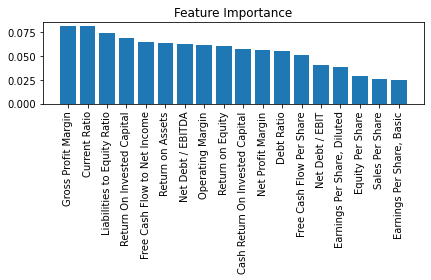

In [125]:
# Determine feature importance 
importances = classifier.feature_importances_

# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt

# Display Feature Importance 
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.savefig('Top_10_MC_gb_feature_importances')
plt.show()
